<a href="https://colab.research.google.com/github/sushmitha6145/CodersCave/blob/main/Phase2_GoldenTask_Spam_Emails.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[DataSet](https://www.kaggle.com/datasets/jackksoncsie/spam-email-dataset)

In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv("/content/emails.csv")

# Rename columns for clarity
data.columns = ["text", "spam"]

# Display the first few rows of the dataframe
print(data.head())


                                                text  spam
0  Subject: naturally irresistible your corporate...     1
1  Subject: the stock trading gunslinger  fanny i...     1
2  Subject: unbelievable new homes made easy  im ...     1
3  Subject: 4 color printing special  request add...     1
4  Subject: do not have money , get software cds ...     1


In [2]:
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target variable (y)
X = data["text"]
y = data["spam"]

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the train and test sets
print("Train set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Train set shape: (4582,)
Test set shape: (1146,)


In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the test data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Display the shape of the transformed data
print("Train set shape after TF-IDF transformation:", X_train_tfidf.shape)
print("Test set shape after TF-IDF transformation:", X_test_tfidf.shape)


Train set shape after TF-IDF transformation: (4582, 33790)
Test set shape after TF-IDF transformation: (1146, 33790)


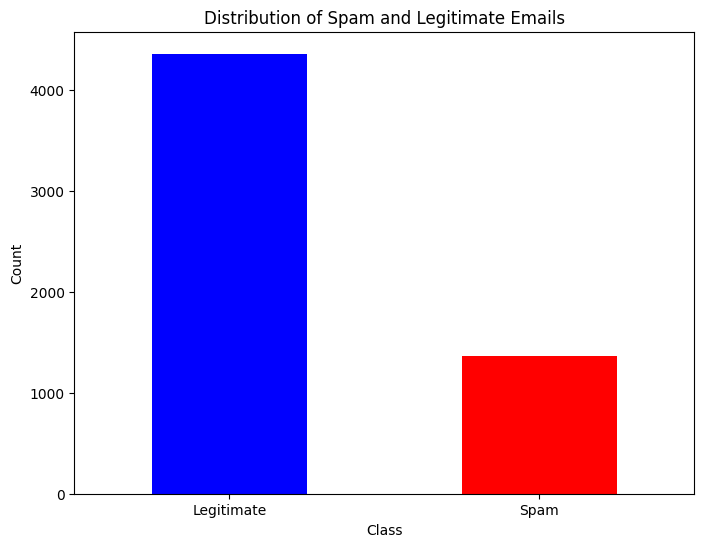

In [5]:
import matplotlib.pyplot as plt

# Count the occurrences of each class
class_counts = data["spam"].value_counts()

# Plot the bar plot
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color=['blue', 'red'])
plt.title('Distribution of Spam and Legitimate Emails')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0, 1], ['Legitimate', 'Spam'], rotation=0)
plt.show()


In [4]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Naive Bayes classifier
clf = MultinomialNB()

# Train the classifier
clf.fit(X_train_tfidf, y_train)

# Predict on the test set
y_pred = clf.predict(X_test_tfidf)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Display classification report
print(classification_report(y_test, y_pred))


Accuracy: 0.8516579406631762
              precision    recall  f1-score   support

           0       0.83      1.00      0.91       856
           1       1.00      0.41      0.59       290

    accuracy                           0.85      1146
   macro avg       0.92      0.71      0.75      1146
weighted avg       0.88      0.85      0.83      1146

